# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
car=pd.read_excel("Data_Train.xlsx")
car_test = pd.read_excel("Data_Test.xlsx")

In [3]:
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# FILLING NULL VALUES

In [4]:
car.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [5]:
car['Seats'].fillna(5,inplace=True)

In [6]:
car['Engine'].fillna('0 CC',inplace=True)

In [7]:
car['Engine']=car['Engine'].apply(lambda x : x.split(' ')[0])

In [8]:
car.mean(axis=0)

Year                  2013.358199
Kilometers_Driven    58738.380296
Seats                    5.276790
Price                    9.479468
dtype: float64

In [9]:
car['Engine']=car['Engine'].astype(str).astype(int)

In [10]:
car.mean(axis=0)

Year                  2013.358199
Kilometers_Driven    58738.380296
Engine                1611.579498
Seats                    5.276790
Price                    9.479468
dtype: float64

In [11]:
car['Engine']=car['Engine'].replace(to_replace=0,value=1611)

In [12]:
car.mean(axis=0)

Year                  2013.358199
Kilometers_Driven    58738.380296
Engine                1621.214986
Seats                    5.276790
Price                    9.479468
dtype: float64

In [13]:
car['Mileage'].fillna('0 kmpl',inplace=True)
car['Mileage']=car['Mileage'].apply(lambda x:x.split(' ')[0])

In [14]:
car['Mileage'].head()

0     26.6
1    19.67
2     18.2
3    20.77
4     15.2
Name: Mileage, dtype: object

In [15]:
car['Mileage']=car['Mileage'].astype(str).astype(float)

In [16]:
car['Mileage'].mean()

18.128935039043082

In [17]:
car['Mileage']=car['Mileage'].replace(to_replace=0,value=18.12)

In [18]:
car['Mileage'].mean()

18.33966771889022

In [19]:
Company_name=car['Name'].apply(lambda x:x.split(" ")[0])
car.insert(0,'Company',Company_name)

In [20]:
car.head()

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,1.75
1,Hyundai,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50
2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,4.50
3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,6.00
4,Audi,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8 bhp,5.0,17.74


In [21]:
car['Company'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [22]:
car['Company'].nunique()

31

In [23]:
car=car.drop(['Name'],axis=1)

In [24]:
car['Power'].fillna('0 bhp',inplace=True)

In [25]:
car['Power']=car['Power'].apply(lambda x:x.split(' ')[0])

In [26]:
car['Power']=car['Power'].replace(to_replace='null',value='0')

In [27]:
car['Power']=car['Power'].astype(str).astype(float)

In [28]:
car['Power'].mean()

110.56237248712324

In [29]:
car['Power']=car["Power"].replace(to_replace=0,value=110.56)

In [30]:
car['Power'].mean()

113.18906795148636

In [31]:
car.head()

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


In [32]:
car.isnull().sum()

Company              0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [33]:
car['Kilometers_Driven']/=1000

In [34]:
car.rename(columns={'Engine':'Engine(cc)','Mileage':'Mileage(kmpl)','Power':'Power(bhp)','Kilometers_Driven':'Kilometers_Driven(x10^3)'})

,Company,Location,Year,Kilometers_Driven(x10^3),Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Price
0,Maruti,Mumbai,2010,72.000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41.000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda,Chennai,2011,46.000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti,Chennai,2012,87.000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40.670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27.365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75
6015,Hyundai,Jaipur,2015,100.000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00
6016,Mahindra,Jaipur,2012,55.000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90
6017,Maruti,Kolkata,2013,46.000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65


In [35]:
car_test['Seats'].fillna(5,inplace=True)

In [36]:
car_test['Engine'].fillna('0 CC',inplace=True)
car_test['Engine']=car_test['Engine'].apply(lambda x : x.split(' ')[0])
car_test['Engine']=car_test['Engine'].astype(str).astype(int)
car_test['Engine']=car_test['Engine'].replace(to_replace=0,value=1580)

In [37]:
Company_name=car_test['Name'].apply(lambda x:x.split(" ")[0])
car_test.insert(0,'Company',Company_name)
car_test=car_test.drop(['Name'],axis=1)

In [38]:
car_test['Mileage']=car_test['Mileage'].apply(lambda x:x.split(' ')[0])
car_test['Mileage']=car_test['Mileage'].astype(str).astype(float)
car_test['Mileage']=car_test['Mileage'].replace(to_replace=0,value=18.17)

In [39]:
car_test['Power'].fillna('0 bhp',inplace=True)
car_test['Power']=car_test['Power'].apply(lambda x:x.split(' ')[0])
car_test['Power']=car_test['Power'].replace(to_replace='null',value='0')
car_test['Power']=car_test['Power'].astype(str).astype(float)
car_test['Power']=car_test["Power"].replace(to_replace=0,value=107.51)

In [40]:
car_test['Kilometers_Driven']/=1000

In [41]:
car_test.head()

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,40.929,CNG,Manual,First,32.26,998,58.20,4.0
1,Maruti,Coimbatore,2013,54.493,Petrol,Manual,Second,24.70,796,47.30,5.0
2,Toyota,Mumbai,2017,34.000,Diesel,Manual,First,13.68,2393,147.80,7.0
3,Toyota,Hyderabad,2012,139.000,Diesel,Manual,First,23.59,1364,107.51,5.0
4,Hyundai,Mumbai,2014,29.000,Petrol,Manual,First,18.50,1197,82.85,5.0


# ANALYSING THE DATA

In [42]:
car.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [43]:
car.Year.nunique()

22

In [44]:
car.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [45]:
car.Fuel_Type.nunique()

5

In [46]:
car.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [47]:
car.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [48]:
car.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

In [49]:
car.Seats.nunique()

9

In [50]:
car.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,58.738380,18.339668,1621.214986,113.189068,5.276790,9.479468
std,3.269742,91.268843,4.151188,599.554389,53.232600,0.806346,11.187917
min,1998.000000,0.171000,6.400000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,34.000000,15.400000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,53.000000,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,73.000000,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6500.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [51]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Company              6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null float64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null int64
Power                6019 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


# EDA

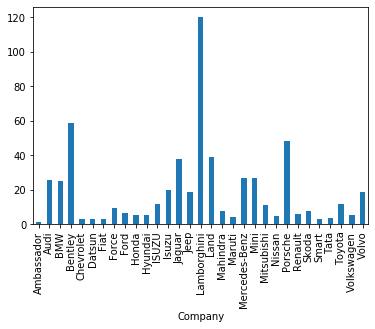

In [52]:
car.groupby('Company').Price.mean().plot(kind='bar')

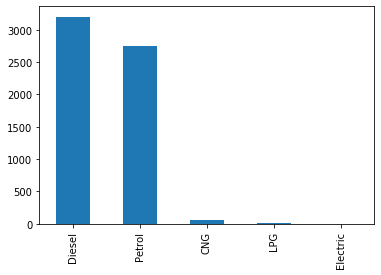

In [53]:
car['Fuel_Type'].value_counts().plot(kind='bar')

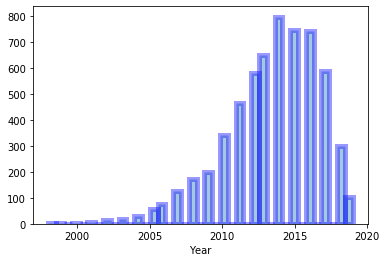

In [54]:
sns.distplot(car['Year'],kde=False,hist_kws=dict(edgecolor="b", linewidth=5))

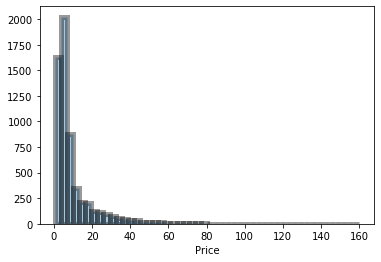

In [55]:
sns.distplot(car['Price'],kde=False,hist_kws=dict(edgecolor="k", linewidth=5))

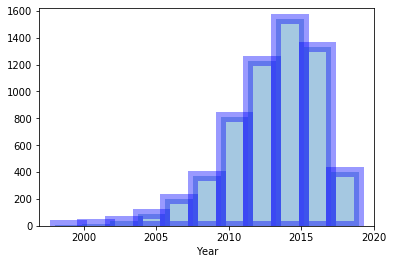

In [56]:
sns.distplot(car['Year'],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="b", linewidth=10))

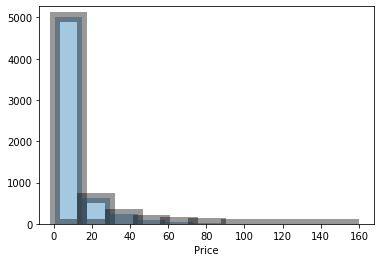

In [57]:
sns.distplot(car['Price'],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=10))

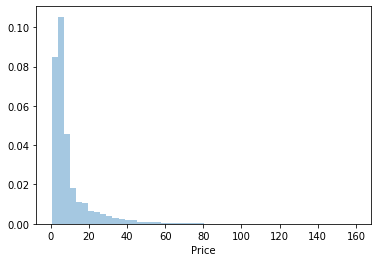

In [58]:
sns.distplot(car['Price'],kde=False,norm_hist=True,bins=50)

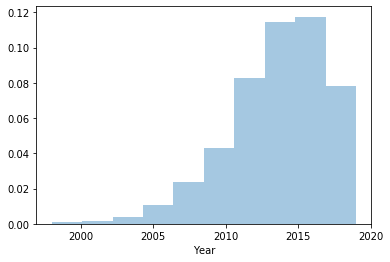

In [59]:
sns.distplot(car['Year'],kde=False,norm_hist=True,bins=10)

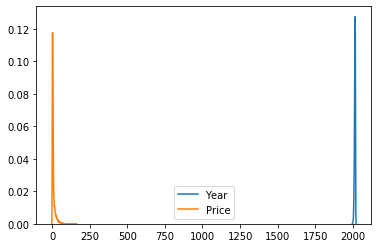

In [60]:
sns.kdeplot(car['Year'],shade=False)
sns.kdeplot(car['Price'],shade=False)

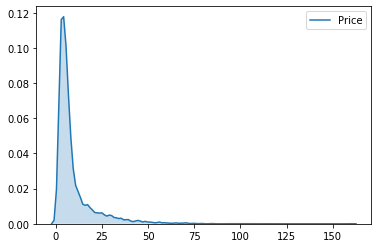

In [61]:
sns.kdeplot(car['Price'],shade=True)

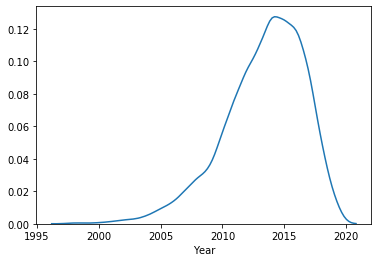

In [62]:
sns.distplot(car['Year'],kde=True,bins=10, hist=False)

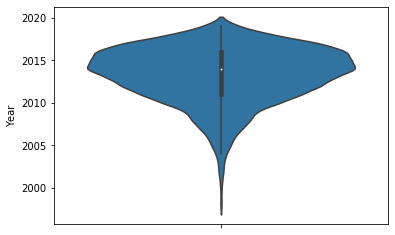

In [63]:
sns.violinplot(y='Year',data=car)

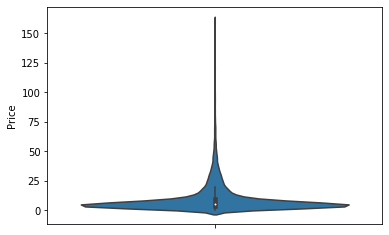

In [64]:
sns.violinplot(y='Price',data=car)

In [65]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Company              6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null float64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null int64
Power                6019 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


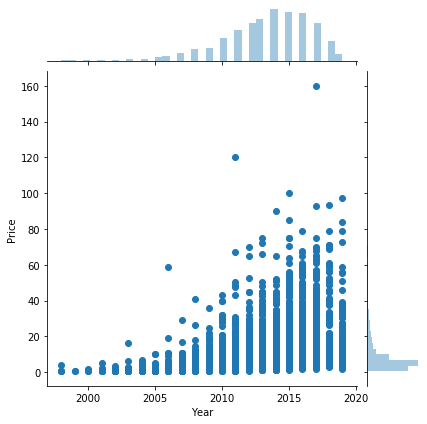

In [66]:
sns.jointplot(x="Year", y="Price",data=car)

/home/pradyumna/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


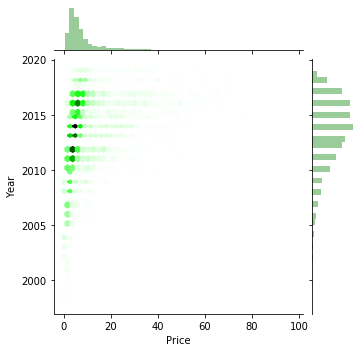

In [67]:
sns.jointplot(x="Price", y="Year", data=car.loc[(car['Price']>0)&(car['Price']<100),:],kind="hex",size=5,color="g")

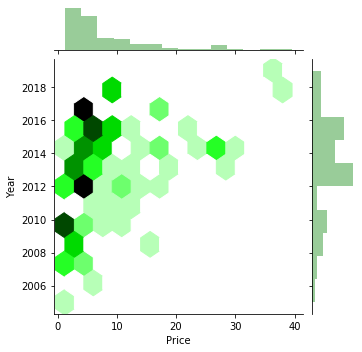

In [68]:
sns.jointplot(x="Price",y="Year",data=car.iloc[:100,:], kind="hex",size=5,color="g")

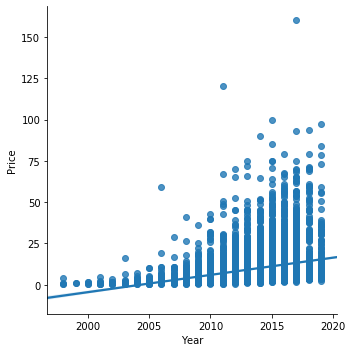

In [69]:
sns.lmplot('Year','Price',data=car,order=1)

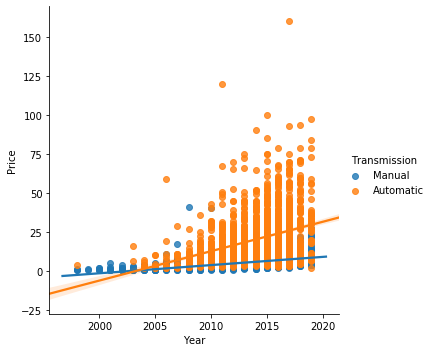

In [70]:
sns.lmplot('Year', 'Price', data=car,hue='Transmission')

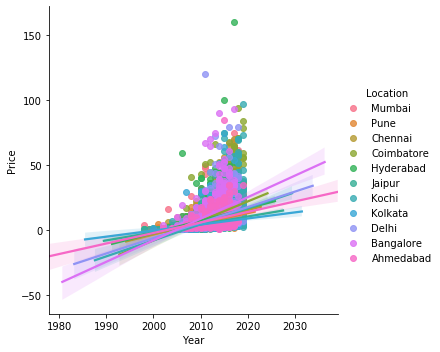

In [71]:
sns.lmplot('Year', 'Price', data=car,hue='Location')

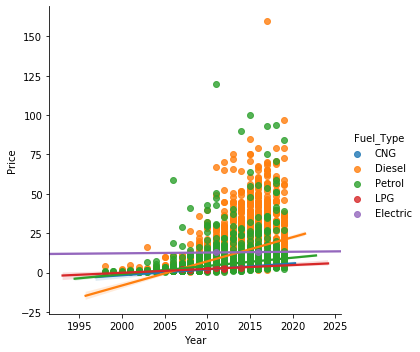

In [72]:
sns.lmplot('Year', 'Price', data=car,hue='Fuel_Type')

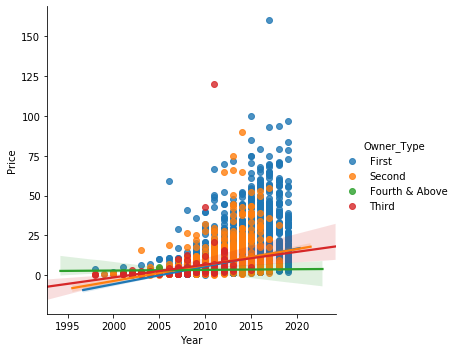

In [73]:
sns.lmplot('Year', 'Price', data=car,hue='Owner_Type')

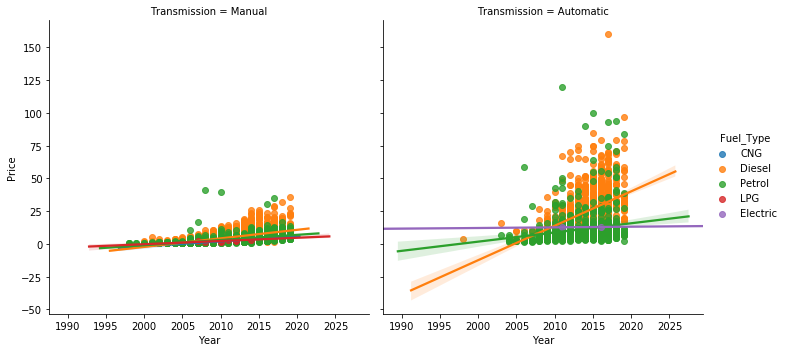

In [74]:
sns.lmplot('Year', 'Price', data=car, hue='Fuel_Type',col='Transmission')

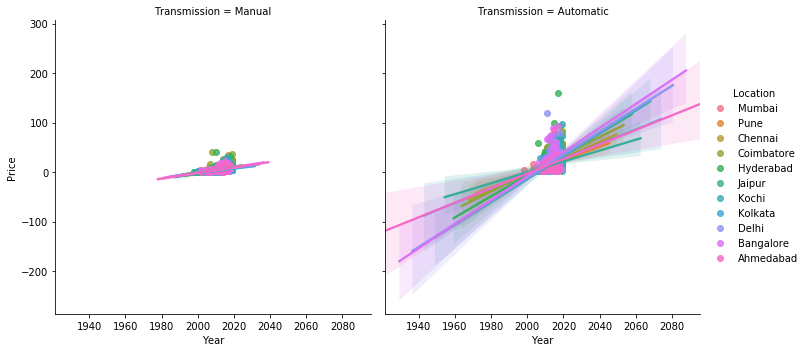

In [75]:
sns.lmplot('Year', 'Price', data=car, hue='Location',col='Transmission')

In [76]:
car.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [77]:
car['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

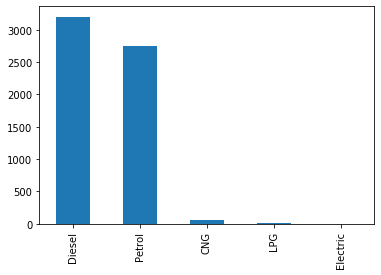

In [78]:
car['Fuel_Type'].value_counts().plot(kind='bar')

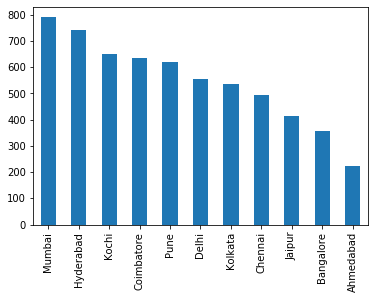

In [79]:
car['Location'].value_counts().plot(kind='bar')

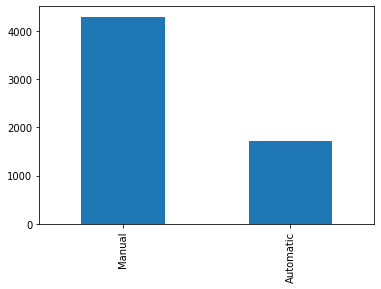

In [80]:
car['Transmission'].value_counts().plot(kind='bar')

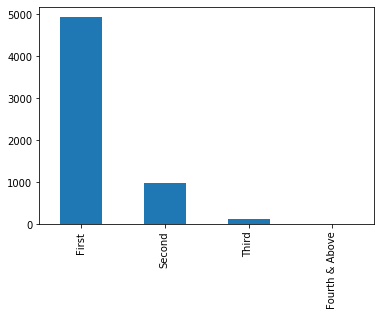

In [81]:
car['Owner_Type'].value_counts().plot(kind='bar')

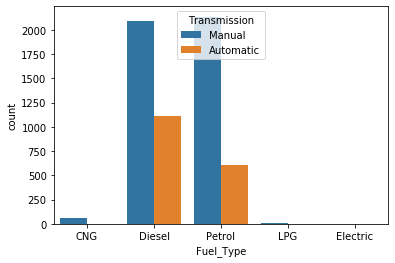

In [82]:
sns.countplot(x="Fuel_Type", data=car, hue = 'Transmission')

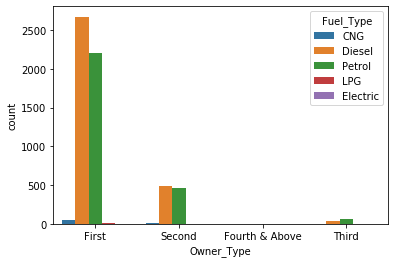

In [83]:
sns.countplot(x="Owner_Type", data=car, hue = 'Fuel_Type')

# CORRELATION

In [84]:
car.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.173048,0.291343,-0.051582,0.015682,0.015204,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.064281,0.091018,0.033191,0.082782,-0.011493
Mileage,0.291343,-0.064281,1.000000,-0.639838,-0.548295,-0.341326,-0.329994
Engine,-0.051582,0.091018,-0.639838,1.000000,0.859344,0.393017,0.657143
Power,0.015682,0.033191,-0.548295,0.859344,1.000000,0.100598,0.767852
Seats,0.015204,0.082782,-0.341326,0.393017,0.100598,1.000000,0.052811
Price,0.305327,-0.011493,-0.329994,0.657143,0.767852,0.052811,1.000000


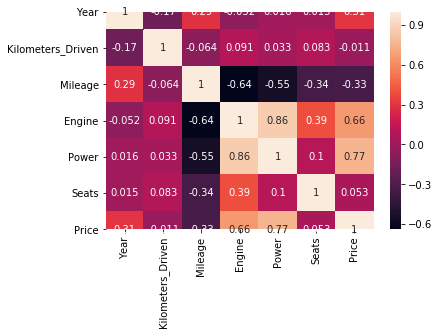

In [85]:
corr=car.corr()
sns.heatmap(corr,annot=True)

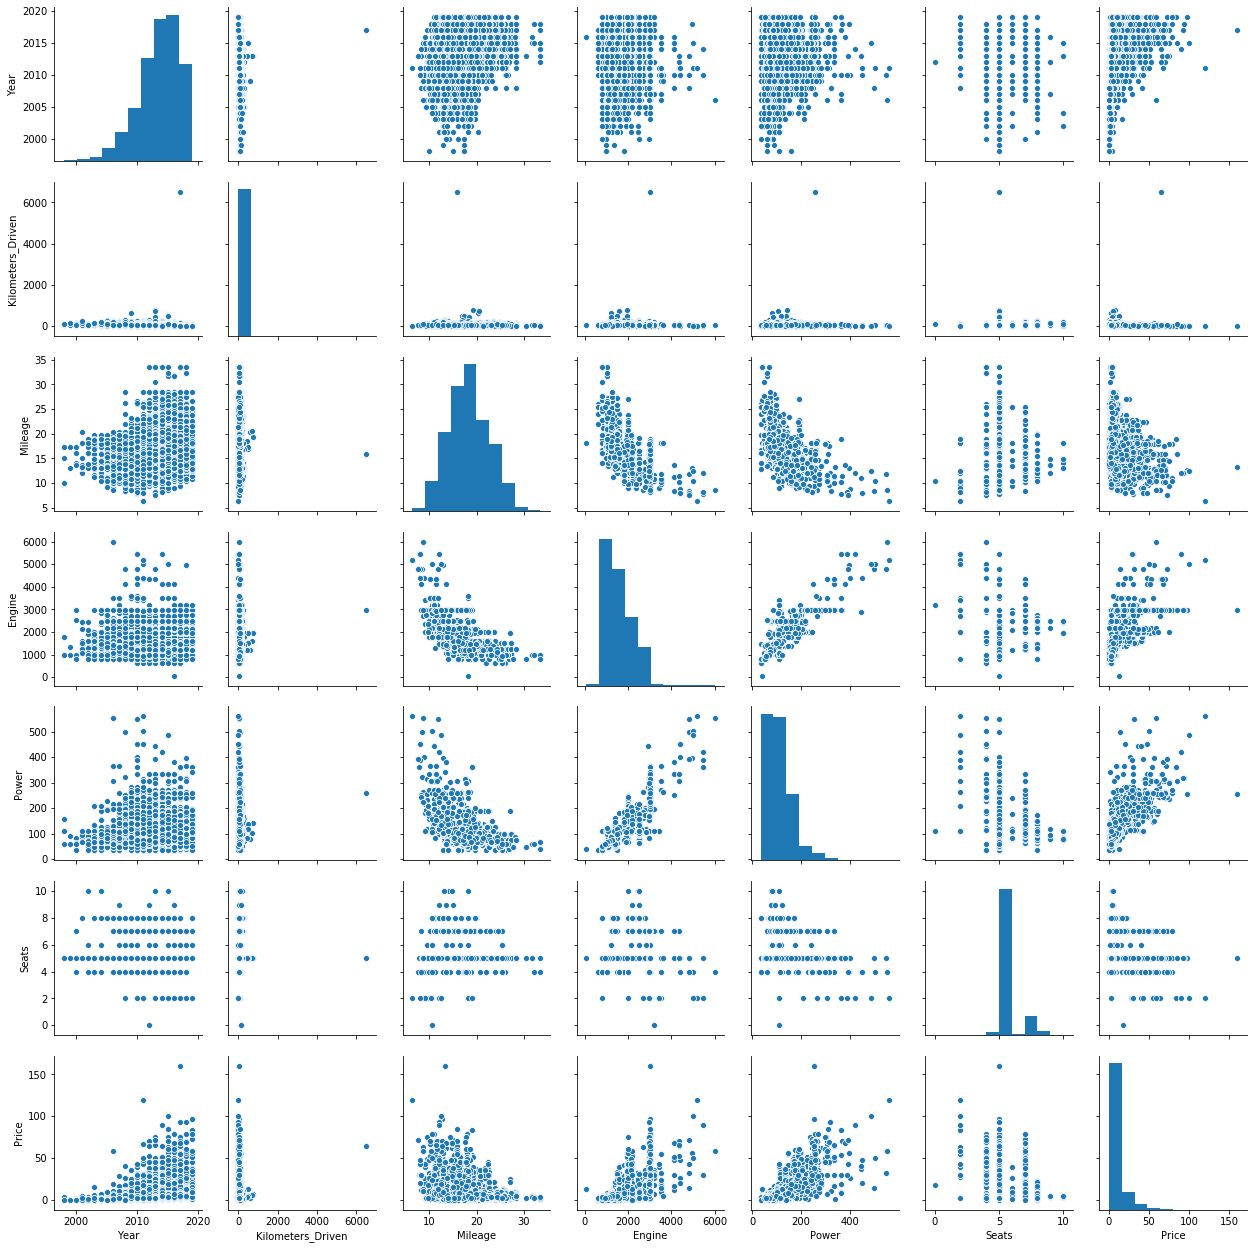

In [86]:
sns.pairplot(car)

In [87]:
Q1 = car['Price'].quantile(0.25)
print(Q1)
Q3 =car['Price'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
print(Q1 - (1.5 * IQR))
print(Q3 + (1.5 * IQR))

3.5
9.95
6.449999999999999
-6.174999999999999
19.625


In [88]:
Q1 = car['Kilometers_Driven'].quantile(0.25)
print(Q1)
Q3 =car['Kilometers_Driven'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
print(Q1 - (1.5 * IQR))
print(Q3 + (1.5 * IQR))

34.0
73.0
39.0
-24.5
131.5


# FINDING AND REMOVING OUTLIERS

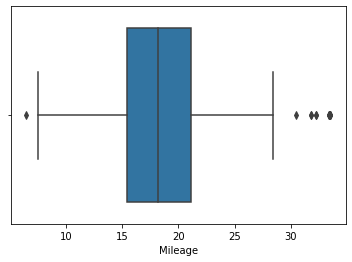

In [89]:
sns.boxplot(car['Mileage'])

As Seen there are outliers.

In [90]:
car[car['Mileage'] > 30].head()

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1269,Maruti,Mumbai,2018,10.600,CNG,Manual,First,33.44,796,40.30,4.0,3.50
1332,Maruti,Pune,2013,79.494,CNG,Manual,First,33.54,998,67.04,5.0,2.96
2059,Maruti,Mumbai,2013,54.000,CNG,Manual,First,33.54,998,67.04,5.0,3.05
2371,Maruti,Pune,2014,29.202,CNG,Manual,First,33.54,998,67.04,5.0,3.90
2701,Maruti,Kochi,2016,70.536,CNG,Manual,First,31.79,998,58.33,5.0,4.58


In [91]:
index = car[(car['Mileage'] >30)].index
car.drop(index, inplace=True)
car['Mileage'].describe()

count    6005.000000
mean       18.305818
std         4.096071
min         6.400000
25%        15.400000
50%        18.120000
75%        21.100000
max        28.400000
Name: Mileage, dtype: float64

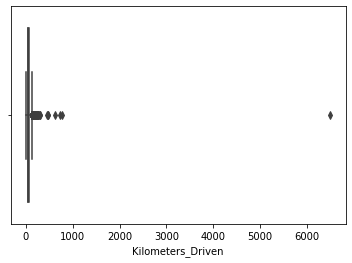

In [92]:
sns.boxplot(car['Kilometers_Driven'])

In [93]:
car[car['Kilometers_Driven'] > 500].head(1000)

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
340,Skoda,Kolkata,2013,775.0,Diesel,Automatic,First,19.30,1968,141.0,5.0,7.5
358,Hyundai,Chennai,2009,620.0,Petrol,Manual,First,20.36,1197,78.9,5.0,2.7
1860,Volkswagen,Chennai,2013,720.0,Diesel,Manual,First,20.54,1598,103.6,5.0,5.9
2328,BMW,Chennai,2017,6500.0,Diesel,Automatic,First,15.97,2993,258.0,5.0,65.0


In [94]:
index = car[(car['Kilometers_Driven'] >1000)].index
car.drop(index, inplace=True)
car['Kilometers_Driven'].describe()

count    6004.000000
mean       57.691232
std        37.905231
min         0.171000
25%        34.000000
50%        53.000000
75%        73.000000
max       775.000000
Name: Kilometers_Driven, dtype: float64

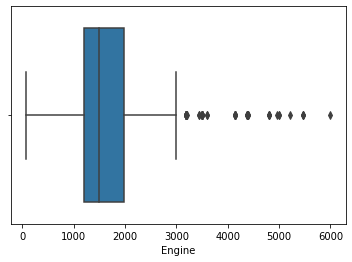

In [95]:
sns.boxplot(car['Engine'])

In [96]:
car[car['Engine'] > 3000].head(1000)

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
70,Porsche,Mumbai,2008,73.000,Petrol,Automatic,First,8.50,4806,500.0,5.0,14.50
152,Mercedes-Benz,Kolkata,2010,35.277,Petrol,Automatic,First,7.81,5461,362.9,5.0,30.00
459,Audi,Coimbatore,2016,51.002,Diesel,Automatic,First,11.33,4134,335.2,7.0,48.91
586,Audi,Kochi,2014,79.926,Diesel,Automatic,First,11.33,4134,335.2,7.0,29.77
589,Mercedes-Benz,Bangalore,2006,47.088,Petrol,Automatic,Second,10.13,3498,364.9,5.0,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5728,Mercedes-Benz,Kolkata,2009,43.600,Petrol,Automatic,First,10.93,3498,272.0,5.0,10.24
5781,Lamborghini,Delhi,2011,6.500,Petrol,Automatic,Third,6.40,5204,560.0,2.0,120.00
5885,Mercedes-Benz,Pune,2010,93.000,Petrol,Automatic,Second,11.80,3498,272.0,7.0,15.00
5919,Jaguar,Hyderabad,2015,8.000,Petrol,Automatic,First,12.50,5000,488.1,2.0,100.00


These are high end cars as evident from the company

In [97]:
index = car[(car['Engine'] >3000)].index
car.drop(index, inplace=True)
car['Engine'].describe()

count    5943.0000
mean     1598.8351
std       548.9450
min        72.0000
25%      1198.0000
50%      1493.0000
75%      1968.0000
max      2999.0000
Name: Engine, dtype: float64

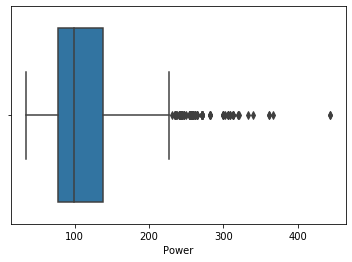

In [98]:
sns.boxplot(car['Power'])

In [99]:
car[car['Power'] > 300].head(1000)

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
134,Mercedes-Benz,Kolkata,2017,13.372,Petrol,Automatic,First,19.00,2996,362.07,2.0,54.00
148,Audi,Mumbai,2013,23.000,Petrol,Automatic,First,11.05,2894,444.00,4.0,37.00
326,BMW,Mumbai,2011,30.000,Diesel,Automatic,First,9.52,2993,313.00,4.0,49.00
418,Mercedes-Benz,Coimbatore,2018,22.397,Petrol,Automatic,First,11.50,2996,367.00,5.0,70.99
1123,BMW,Pune,2008,66.000,Petrol,Automatic,Second,8.45,2979,321.00,5.0,10.75
1741,BMW,Hyderabad,2013,58.000,Diesel,Automatic,First,11.20,2993,306.00,4.0,48.00
1974,BMW,Coimbatore,2018,28.060,Petrol,Automatic,First,12.05,2979,320.00,5.0,93.67
1984,BMW,Bangalore,2017,17.465,Petrol,Automatic,First,12.05,2979,320.00,5.0,93.00
2089,BMW,Mumbai,2013,30.000,Diesel,Automatic,First,9.52,2993,313.00,4.0,45.00
2095,Mercedes-Benz,Coimbatore,2019,2.526,Petrol,Automatic,First,19.00,2996,362.07,2.0,83.96


These are high end cars as evident from the company

In [100]:
index = car[(car['Power'] >300)].index
car.drop(index, inplace=True)
car['Power'].describe()

count    5921.000000
mean      110.498093
std        46.576142
min        34.200000
25%        77.000000
50%        98.600000
75%       136.000000
max       300.000000
Name: Power, dtype: float64

In [101]:
car.Price

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5921, dtype: float64

In [102]:
car.head(5921)

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72.000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41.000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda,Chennai,2011,46.000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti,Chennai,2012,87.000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40.670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27.365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75
6015,Hyundai,Jaipur,2015,100.000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00
6016,Mahindra,Jaipur,2012,55.000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90
6017,Maruti,Kolkata,2013,46.000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65


In [103]:
car.isnull().sum()

Company              0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

# SPLITTING TRAINING AND TESTING DATA 

In [104]:
from sklearn.model_selection import train_test_split

y = np.log1p(car.Price)  
X = car.drop(['Price'],axis=1)


X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.82,test_size=0.18,random_state=0)


In [105]:
X_train.head()

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
3929,Honda,Hyderabad,2017,12.538,Petrol,Automatic,First,18.00,1497,117.30,5.0
2057,Hyundai,Kolkata,2009,65.000,Diesel,Manual,Second,13.60,1991,142.00,5.0
4731,Nissan,Pune,2018,24.000,Petrol,Manual,First,19.69,1198,67.04,5.0
953,Maruti,Pune,2016,14.930,Petrol,Manual,First,21.40,1197,83.10,5.0
3349,Mercedes-Benz,Pune,2010,130.923,Diesel,Automatic,First,14.21,2143,203.00,5.0


In [106]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()



X_train['Company'] = label_encoder.fit_transform(X_train['Company'])
X_valid['Company'] = label_encoder.fit_transform(X_valid['Company'])
car_test['Company'] = label_encoder.fit_transform(car_test['Company'])

X_train['Location'] = label_encoder.fit_transform(X_train['Location'])
X_valid['Location'] = label_encoder.fit_transform(X_valid['Location'])
car_test['Location'] = label_encoder.fit_transform(car_test['Location'])

X_train['Fuel_Type'] = label_encoder.fit_transform(X_train['Fuel_Type'])
X_valid['Fuel_Type'] = label_encoder.fit_transform(X_valid['Fuel_Type'])
car_test['Fuel_Type'] = label_encoder.fit_transform(car_test['Fuel_Type'])


X_train['Transmission'] = label_encoder.fit_transform(X_train['Transmission'])
X_valid['Transmission'] = label_encoder.fit_transform(X_valid['Transmission'])
car_test['Transmission'] = label_encoder.fit_transform(car_test['Transmission'])


X_train['Owner_Type'] = label_encoder.fit_transform(X_train['Owner_Type'])
X_valid['Owner_Type'] = label_encoder.fit_transform(X_valid['Owner_Type'])
car_test['Owner_Type'] = label_encoder.fit_transform(car_test['Owner_Type'])


/home/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [107]:
car_test

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,16,4,2014,40.929,0,1,0,32.26,998,58.20,4.0
1,16,3,2013,54.493,3,1,2,24.70,796,47.30,5.0
2,26,9,2017,34.000,1,1,0,13.68,2393,147.80,7.0
3,26,5,2012,139.000,1,1,0,23.59,1364,107.51,5.0
4,9,9,2014,29.000,3,1,0,18.50,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,27,5,2011,89.411,1,1,0,20.54,1598,103.60,5.0
1230,27,9,2015,59.000,3,0,0,17.21,1197,103.60,5.0
1231,20,8,2012,28.000,1,1,0,23.08,1461,63.10,5.0
1232,27,10,2013,52.262,3,0,3,17.20,1197,103.60,5.0


In [108]:
X_train.head()

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
3929,8,5,2017,12.538,4,0,0,18.00,1497,117.30,5.0
2057,9,8,2009,65.000,1,1,2,13.60,1991,142.00,5.0
4731,19,10,2018,24.000,4,1,0,19.69,1198,67.04,5.0
953,15,10,2016,14.930,4,1,0,21.40,1197,83.10,5.0
3349,16,10,2010,130.923,1,0,0,14.21,2143,203.00,5.0


# LINEAR REGRESSION MODEL

In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
plt.show()

In [110]:
y_pred = reg.predict(X_valid)

In [111]:
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})
df

,Actual,Predicted
1407,2.802754,3.218169
5121,1.252763,1.083665
2765,1.704748,1.996567
1856,1.808289,1.992640
748,1.163151,1.144003
...,...,...
1569,2.079442,2.074202
3966,2.564949,2.526250
97,1.492904,1.806370
4166,4.043051,3.919596


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: " + str(mean_absolute_error(y_pred, y_valid)))
print("MSE: " + str(mean_squared_error(y_pred, y_valid)))

MAE: 0.18936994245217056
MSE: 0.06117303034635044


In [113]:
reg.score(X_valid,y_valid)

0.8799736183553448

Text(0, 0.5, 'Predicted')

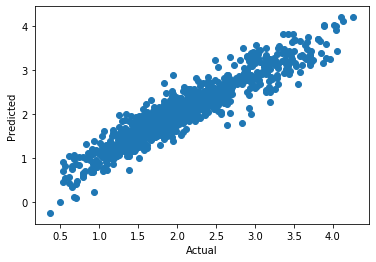

In [114]:
plt.scatter(y_valid,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# SVM MODEL

In [115]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [116]:
sc_X = StandardScaler()
X_train1=X_train
X_valid1=X_valid
X_train1= sc_X.fit_transform(X_train)
X_valid1 = sc_X.fit_transform(X_valid)

In [117]:
regressor1 = SVR(kernel='poly')
regressor1.fit(X_train1, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
y_pred1 = regressor1.predict(X_valid1)

In [119]:
df1= pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred1})
df1

,Actual,Predicted
1407,2.802754,3.066569
5121,1.252763,1.116962
2765,1.704748,1.971847
1856,1.808289,1.966613
748,1.163151,1.072972
...,...,...
1569,2.079442,2.116679
3966,2.564949,2.224062
97,1.492904,1.601239
4166,4.043051,3.615894


In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: " + str(mean_absolute_error(y_pred1, y_valid)))
print("MSE: " + str(mean_squared_error(y_pred1, y_valid)))

MAE: 0.1688356442851534
MSE: 0.05352523983359263


In [121]:
regressor1.score(X_valid1,y_valid)

0.8949791954474957

Text(0, 0.5, 'Predicted')

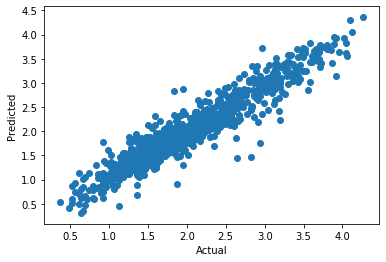

In [122]:
plt.scatter(y_valid,y_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# RANDOM FOREST REGRESSOR

In [123]:
from sklearn.ensemble import RandomForestRegressor

regressor2 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor2.fit(X_train, y_train)
y_pred2 = regressor2.predict(X_valid)

In [124]:
df2= pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred2})
df2

,Actual,Predicted
1407,2.802754,2.930697
5121,1.252763,1.203886
2765,1.704748,1.865974
1856,1.808289,1.880001
748,1.163151,1.119651
...,...,...
1569,2.079442,2.202443
3966,2.564949,2.479940
97,1.492904,1.403520
4166,4.043051,4.108275


In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: " + str(mean_absolute_error(y_pred2, y_valid)))
print("MSE: " + str(mean_squared_error(y_pred2, y_valid)))

MAE: 0.13181868842246078
MSE: 0.03471281786327488


In [126]:
regressor2.score(X_valid,y_valid)

0.9318906730428567

Text(0, 0.5, 'Predicted')

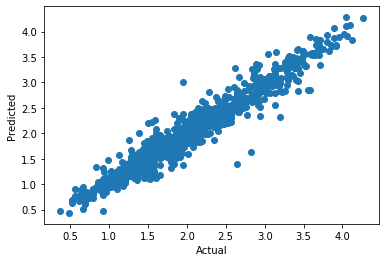

In [127]:
plt.scatter(y_valid,y_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# DECISION TREE REGRESSOR

In [128]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state=0)
regressor3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [129]:
y_pred3=regressor3.predict(X_valid)

In [130]:
df3= pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred3})
df3

,Actual,Predicted
1407,2.802754,3.040706
5121,1.252763,1.321756
2765,1.704748,1.677097
1856,1.808289,2.014903
748,1.163151,1.131402
...,...,...
1569,2.079442,2.066863
3966,2.564949,2.639057
97,1.492904,1.223775
4166,4.043051,4.271933


In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: " + str(mean_absolute_error(y_pred3, y_valid)))
print("MSE: " + str(mean_squared_error(y_pred3, y_valid)))

MAE: 0.18477401406818758
MSE: 0.07428595839635034


In [132]:
regressor3.score(X_valid,y_valid)

0.8542450040019758

Text(0, 0.5, 'Predicted')

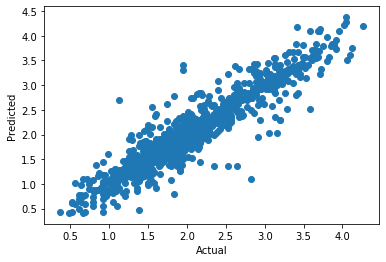

In [133]:
plt.scatter(y_valid,y_pred3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# GRADIENT BOOSTING REGRESSION TREE MODEL

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [135]:
gbm = GradientBoostingRegressor()


In [136]:
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [137]:
y_pred4=gbm.predict(X_valid)

In [138]:
df4= pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred4})
df4

,Actual,Predicted
1407,2.802754,2.990934
5121,1.252763,1.152716
2765,1.704748,1.937076
1856,1.808289,1.924241
748,1.163151,1.138173
...,...,...
1569,2.079442,2.204918
3966,2.564949,2.529913
97,1.492904,1.416310
4166,4.043051,3.766803


In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: " + str(mean_absolute_error(y_pred4, y_valid)))
print("MSE: " + str(mean_squared_error(y_pred4, y_valid)))

MAE: 0.1721086415617406
MSE: 0.05088657340071207


Text(0, 0.5, 'Predicted')

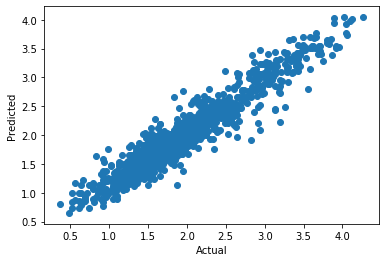

In [140]:
plt.scatter(y_valid,y_pred4)
plt.xlabel('Actual')
plt.ylabel('Predicted')

After applying different models we noticed that Random Forest Regressor model has the least error and highest acccuracy. So we are using that to predict the price.

# PREDICTING PRICE OF TESTING DATA

In [141]:
final=regressor2.predict(car_test)
final=np.exp(final)-1
final=final.round(2)

In [142]:
output=pd.DataFrame({'predicted price':final})
output

,predicted price
0,3.00
1,2.84
2,16.79
3,4.15
4,4.44
...,...
1229,4.23
1230,6.43
1231,2.59
1232,4.35


In [143]:
output.to_excel('Price.xlsx', index=False)

In [144]:
Company=car_test['Company']

Text(0, 0.5, 'output')

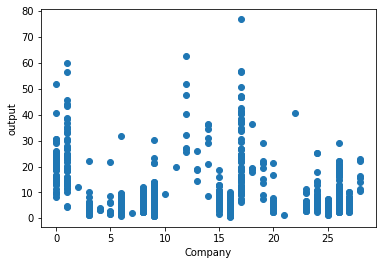

In [145]:
plt.scatter(Company,output)
plt.xlabel('Company')
plt.ylabel('output')

We took the log of prices during training and testing data to improve the accuracy of the model and reduce the error.Then for predicting the price we took exponent to get the actual price.

We have saved the output i.e the predicted price in submission.xlsx file.